In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import collections
import queue
import scipy.io as spio
from scipy.spatial import distance as dist
import random
import seaborn

class K_means:
    # num_centroids: número de centroids escolhido
    # dados: conjunto de dados que sera utilizado
    # num_iter: número de iterações que devemos submeter o conjunto de dados
    def __init__(self, num_centroids, dados, num_iter):
        self.num_centroids = num_centroids
        self.dados = dados
        self.num_iter = num_iter
        self.cluster_labels = []
        self.cluster_centroids = []
    
    def calc_distance(self, x, y):
        return dist.euclidean(x,y)

    def findClosestCentroids(self, ic, X):
        assigned_centroids = []
        for i in X:
            distance = []
            for j in ic:
                distance.append(self.calc_distance(i,j))
            assigned_centroids.append(np.argmin(distance))
        return assigned_centroids


    def calc_centroids(self, clusters, X):
        new_centroids = []
        new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                        axis=1)
        for c in set(new_df['cluster']):
            current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
            cluster_mean = current_cluster.mean(axis=0)
            new_centroids.append(cluster_mean)
        return new_centroids
    
    def runKmeans(self):
        dataArray = np.array(self.dados)
        #print("Dataset em vetor")
       # print(dataArray)
        # Inicializa num_centroids índices de centroids escolhidos aleatoriamente
        init_centroids = random.sample(range(0, len(self.dados)), self.num_centroids)
       # print("Índices dos Centroids escolhidos")
       # print(init_centroids)
        # Recupera o valor de cada um dos índices de centroids escolhidos
        centroids = []
        for i in init_centroids:
            centroids.append(self.dados.loc[i])
        centroids = np.array(centroids)
        #print("Valores dos centroids escolhidos")
        #print(centroids)
        for i in range(self.num_iter):
            get_centroids = self.findClosestCentroids(centroids, dataArray)
            centroids = self.calc_centroids(get_centroids, dataArray)
            
            self.cluster_labels.append(get_centroids)
            self.cluster_centroids.append(centroids)
            
    def plotKmeans(self):
        dataArray = np.array(self.dados)
        for i in range(self.num_iter):
            ## DataFrame precisa ser criado manualmente de acordo com o dataset
            datatest = pd.DataFrame({'Column1': dataArray[:, 0], 'Column2': dataArray[:, 1], 'Column3': dataArray[:, 2], 'Column4': dataArray[:, 3], 'Cluster': self.cluster_labels[i]})
            groups = datatest.groupby("Cluster")

            #plt.scatter(dataArray[:, 0], dataArray[:, 2], alpha=0.1)
            #plt.show()

            plt.figure()
            for name, group in groups:
                plt.plot(group["Column1"], group["Column2"], marker="o", linestyle="", label=name, zorder=1)
            plt.scatter(np.array(self.cluster_centroids[i])[:, 0], np.array(self.cluster_centroids[i])[:, 1], color='black', marker="*",zorder=2, s=100)
    
    def listaTodasDistanciaCentro(self):
        dataArray = np.array(self.dados)
        distancias = []
        
        for i in range(len(dataArray)):
            index = np.array(self.cluster_labels[self.num_iter - 1])[i]
            vetor = np.array(self.cluster_centroids[self.num_iter - 1])
            distancias.append(self.calc_distance(dataArray[i], vetor[index, :]))
        return distancias
            
        
            

Text(0, 0.5, 'Dispersion')

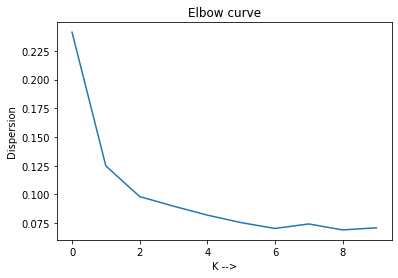

In [253]:
data_set = pd.read_csv('./iris.csv')
dataset = data_set.iloc[:, [0,1,2,3]].values
dataset = pd.DataFrame(dataset)


dataset[0] = pd.to_numeric(dataset[0])
dataset[1] = pd.to_numeric(dataset[1])
dataset[2] = pd.to_numeric(dataset[2])
dataset[3] = pd.to_numeric(dataset[3])

# Normaliza o dataset
def normalization(x, min_x, max_x):
    return (x - min_x) / (max_x - min_x) 
dataset[0] = dataset[0].apply(lambda x: normalization(x, min(dataset[0]), max(dataset[0])))
dataset[1] = dataset[1].apply(lambda x: normalization(x, min(dataset[1]), max(dataset[1])))
dataset[2] = dataset[2].apply(lambda x: normalization(x, min(dataset[2]), max(dataset[2])))
dataset[3] = dataset[3].apply(lambda x: normalization(x, min(dataset[3]), max(dataset[3])))

# Elbow Method
custo_total = []
for i in range(1,11):
    kmeans = K_means(i, dataset, 20)
    kmeans.runKmeans()
    distancias = kmeans.listaTodasDistanciaCentro()
    custo = sum(distancias)/(2*len(dataset))
    custo = np.array(custo)
    custo = custo.item()
    custo_total.append(custo)

x = np.arange(10)
plt.plot(x,custo_total)
plt.title("Elbow curve")
plt.xlabel("K -->")
plt.ylabel("Dispersion")
    
    



In [41]:
# Carrega o dataset
data_input = [i.strip().split() for i in open("./cluster.dat").readlines()]
data_input = pd.DataFrame(data_input)
data_input[0] = pd.to_numeric(data_input[0])
data_input[1] = pd.to_numeric(data_input[1])




# Normaliza o dataset
def normalization(x, min_x, max_x):
    return (x - min_x) / (max_x - min_x) 
data_input[0] = data_input[0].apply(lambda x: normalization(x, min(data_input[0]), max(data_input[0])))
data_input[1] = data_input[1].apply(lambda x: normalization(x, min(data_input[1]), max(data_input[1])))


# Instancia a classe do K-means
k_means = K_means(3, data_input, 50)
k_means.runKmeans()


[[0.36969697 0.98161765]
 [0.35       0.94117647]
 [0.33636364 0.97058824]
 ...
 [0.96666667 0.88419118]
 [0.98030303 0.88970588]
 [0.94090909 0.86948529]]


IndexError: index 2 is out of bounds for axis 1 with size 2